# Análise de Clientes

## Resumo

### TIPO INVESTIDOR
        - 90% dos clientes são conservadores ou moderados
        - Conservador é a classe com o menor nivel de conhecimento
        - O nivel mais alto de conhecimento (5) está apenas no moderado e arrojado
        - Moderado tem uma distribuição quase igual para os níveis de conhecimento
        - Arrojado só tem cliente com nível de conhecimento 4 ou 5 
        - Conservador é o único perfil que pessoas entre 16-32 estão em maior quantidade
        - Pessoas com renda mensal acima de 30000 são moderadas ou arrojadas
        - Conservadores optam por investirem 10% da sua renda mensal muito mais frequentementemente
        - Arrojados optam por investirem 75% da sua renda mensal muito mais frequentemente
        - Moderados tem uma distribuição parecida de quanto compromentem da renda mensal para investir
        - Conservadores investem mais vezes por tempo inderterminado
        - conservadores investem pouco acima de 5 anos
        - moderados investem mais vezes de 1-5 anos
        - arrojados investem mais vezes em indeterminado & acima de 5 anos
        - Conservadores estão ais preocupados com resgate diário

### NIVEL CONHECIMENTO
        - Grande parte é de nivel 1, os outros nivéis são parecidos na distribuição
        - pessoas com maior renda mensal tem o nivel de conhecimento maior

### IDADE
        - a maior parte dos clientes estão entre 24-50 anos
        - somando clientes entre 32-48 anos possuem a maior renda mensal
        - não parece existir correlação entre idade e tempo de investimento

### Renda
        - Grande parte dos cliente tem uma renda mensal de 500-10k
        - Investidores com renda mensal até 10k comprometem pouco da sua renda, 10%-20%
        - Investidores com mais de 10k de renda mensal investem de forma igual parte de sua renda
        - Investidores com até 10k de renda mensal investem mas por tempo inder. e de 1-5 anos
        - Investidores com mais de 10k de renda mensal optam por investimentos de 1-5 anos ou acima de 5 anos

### TEMPO DE INVESTIMENTO
        - Tem uma boa distribuição, porém as classes majoritárias são pessoas que investem por tempo inderteminado e de 1-5 anos
        - Pessoas que investem por tempo inderteminado tendem a querer resgate diário
        - Pessoas que investem 1-5 ou acima de 5 anos, não se importam muito em resgate diário
        - Pessoas que investem até um ano tem interesse em resgate diário, parecido com as de tempo inderteminado
        - Pessoas que investem por tempo inder. investem 75% da sua renda, diferente de todas os outros grupos
        - Investidores que investem acima de 5 anos investem mais de 10% da sua renda com mais frequência
        - Investidores de até um ano e 1-5 anos tendem a nao comprometer muito da renda mensal

### RESGATE DIÁRIO
        - Grande parte dos clientes não precisam de resgate diário do valor investido, seguido por 30% do valor investido
        - Investidores que não precisam de resgate diário aplicam mais vezes 75% da sua renda mensal

### INVESTIMENTO MENSAL
        - Grande parte dos clientes pretendem investir 10% da renda mensal, seguido de 20%, 30%, 75%, 50%


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

In [2]:
df_01 = pd.read_csv("./data/Dataset-1.csv")

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_01.columns

Index(['Unnamed: 0', 'Id', 'Idade', 'EstadoCivil', 'BillingCity',
       'NivelConhecimentoAtual', 'ScoreNivelConhecimento', 'PerfilInvestidor',
       'RendaMensal', 'ValorPatrimonio', 'Pergunta1', 'Resposta11',
       'Pergunta2', 'Resposta21', 'Pergunta3', 'Resposta31', 'Pergunta4',
       'Resposta41', 'Pergunta5', 'Resposta51', 'Resposta52', 'Resposta53',
       'Resposta54', 'Resposta55', 'Resposta56', 'Resposta57', 'Resposta58',
       'Pergunta6', 'Resposta61', 'Resposta62', 'Resposta63', 'Resposta64',
       'Resposta65', 'Resposta66', 'Resposta67', 'Resposta68', 'Pergunta7',
       'Resposta71', 'Resposta72', 'Resposta73', 'Resposta74', 'Resposta75',
       'Pergunta8', 'Resposta81', 'Pergunta9', 'Resposta91', 'ScoreRisco',
       'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'Produto', 'NomeDoProduto',
       'NomeEmissor', 'TaxaCliente', 'TaxaPreCliente', 'DescricaoProduto',
       'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional',
       'DataVencimento', 'Familia

In [4]:
del df_01['Unnamed: 0']

In [5]:
df_01.shape

(38102, 65)

In [6]:
client_cols = ['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento', 'PerfilInvestidor',
              'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'ScoreRisco']

In [7]:
respostas_cols = ['Id', 'Resposta11', 'Resposta31', 'Resposta81']

# ------------------------------------------------------

# Data Wrangling de Clientes

# ------------------------------------------------------

### cria df com clientes únicos

In [8]:
df_client = df_01[client_cols]

In [9]:
df_client.drop_duplicates(inplace=True, subset=['Id'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
print(f"Clientes únicos: {df_client.shape[0]}\n\n")
print(f"coluna Id:\n{df_client['Id'].describe()}\n\n")
print(f"distribuição de perfil de investidor:\n{df_client['PerfilInvestidor'].value_counts()}")

Clientes únicos: 13409


coluna Id:
count                                                 13409
unique                                                13409
top       $2b$10$.DCvvJ9WSDpqVP2xXjeSPeXdA/Rbwncv8hePxA9...
freq                                                      1
Name: Id, dtype: object


distribuição de perfil de investidor:
2    5541
3    3270
4    2043
1    1345
5     689
0     521
Name: PerfilInvestidor, dtype: int64


In [11]:
df_client.head()

,Id,Idade,EstadoCivil,BillingCity,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,ScoreObjetivos,ScoreSituacaoFinanceira,ScoreRisco
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,2,1300.0,6000.0,2.0,1.0,2.0
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,2,500.0,NaN,3.0,1.0,3.0
27,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,32,C,Valparaíso de Goiás,1.0,1,3100.0,250000.0,1.0,1.0,2.0
31,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,47,S,São Paulo,1.0,3,2000.0,NaN,5.0,2.0,4.0
33,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,46,D,Olinda,2.0,2,6000.0,500000.0,2.0,2.0,2.0


## Feature engineering clientes

### Transforma Perfil investidor em 'conservador', 'moderado' e 'arrojado' 

In [12]:
df_client.loc[:,'P_investidor'] = df_client['PerfilInvestidor'].apply(lambda x: 'conservador' if x == 1 or x == 2 
                                                               else 'moderado' if x == 3 or x== 4 else 'arrojado' )

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Número de clientes com o Valor do patrimônio nulo 

In [13]:
df_client['ValorPatrimonio'].isnull().sum()

4980

In [14]:
df_client['b_renda_mensal'] = pd.cut(df_client[df_client['RendaMensal'] <= 50000]['RendaMensal'],bins= 5)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_client['b_idade'] = pd.cut(df_client['Idade'],bins= 5)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Exploração dos dados

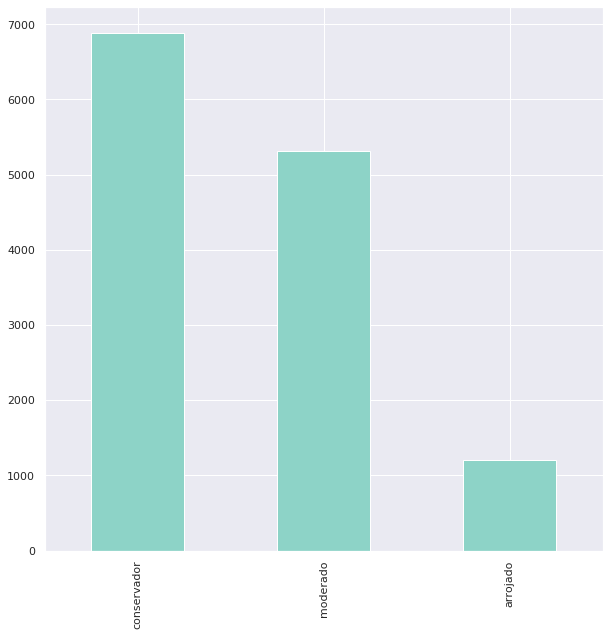

In [16]:
plt.figure(figsize=(10,10))
df_client['P_investidor'].value_counts().plot(kind='bar')

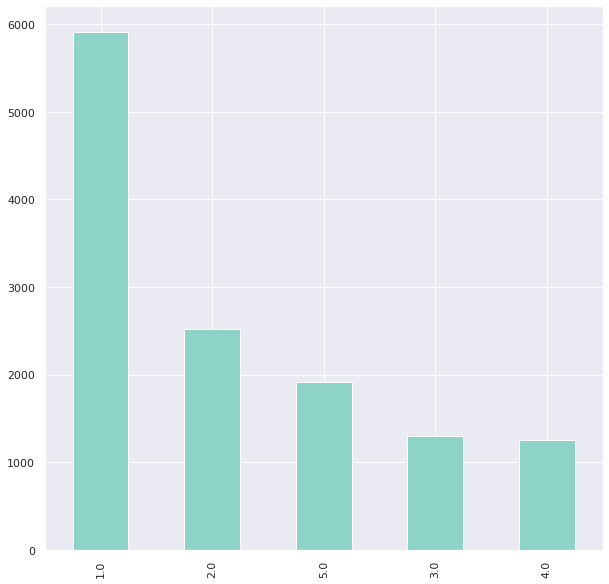

In [17]:
plt.figure(figsize=(10,10))
df_client['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

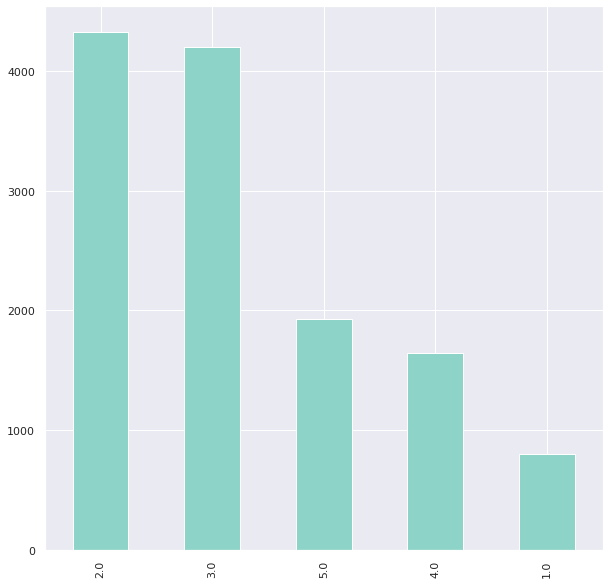

In [18]:
plt.figure(figsize=(10,10))
df_client['ScoreObjetivos'].value_counts().plot(kind='bar')

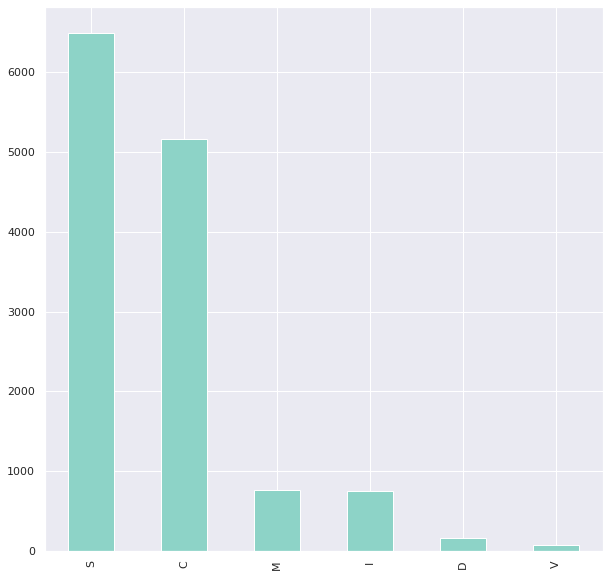

In [19]:
plt.figure(figsize=(10,10))
df_client['EstadoCivil'].value_counts().plot(kind='bar')

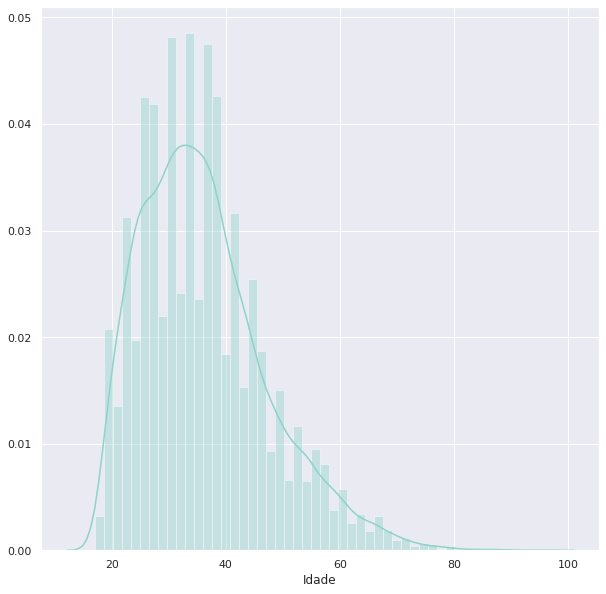

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(df_client['Idade'])

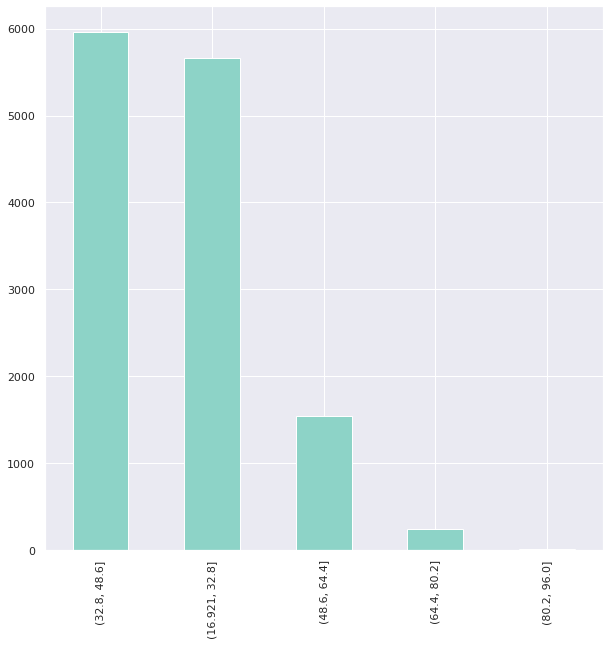

In [21]:
plt.figure(figsize=(10,10))
df_client['b_idade'].value_counts().plot(kind='bar')

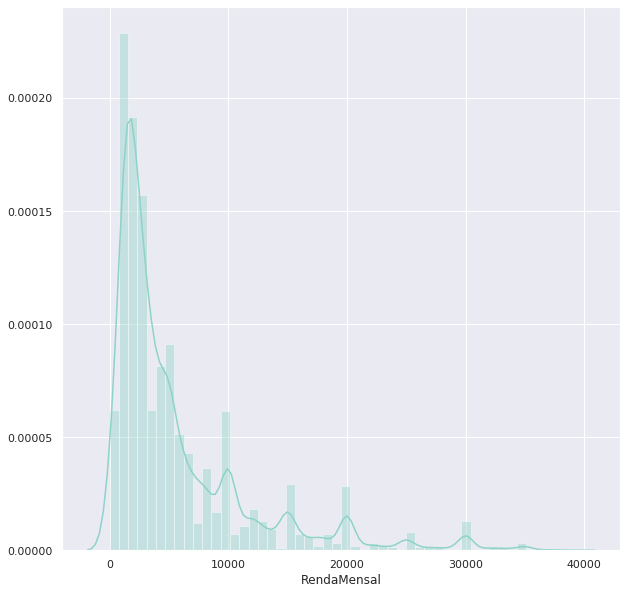

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(df_client[df_client['RendaMensal'] < 40000.00]['RendaMensal'])

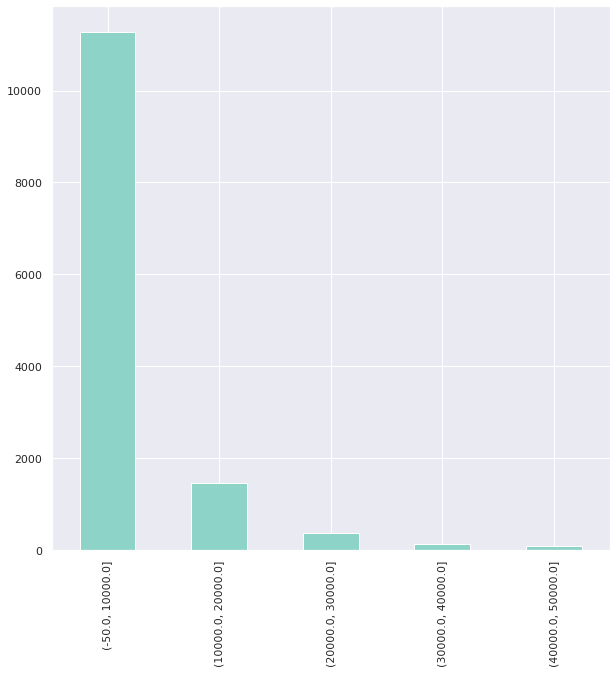

In [23]:
plt.figure(figsize=(10,10))
df_client['b_renda_mensal'].value_counts().plot(kind='bar')

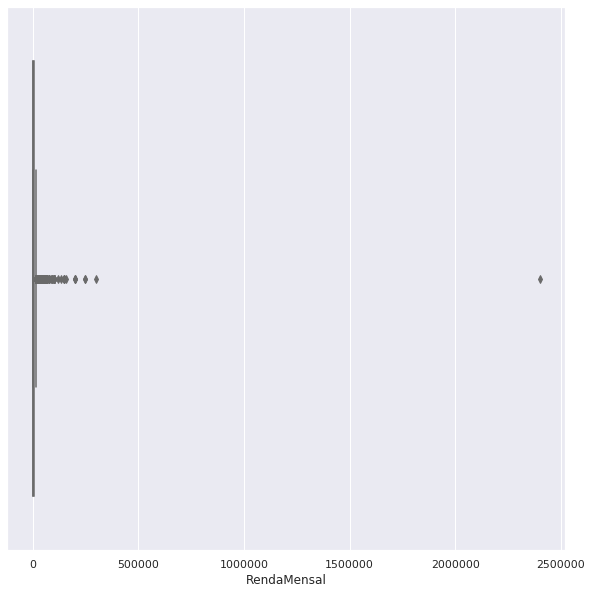

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(df_client['RendaMensal'])

## Exploração Bivariada

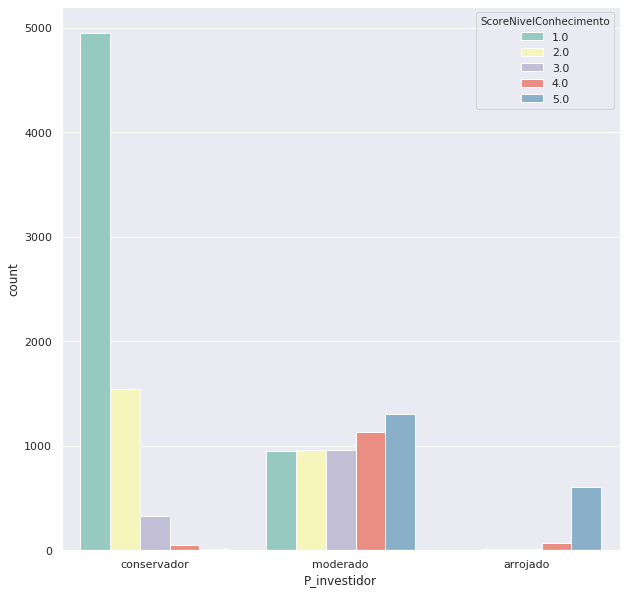

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="ScoreNivelConhecimento", data=df_client)

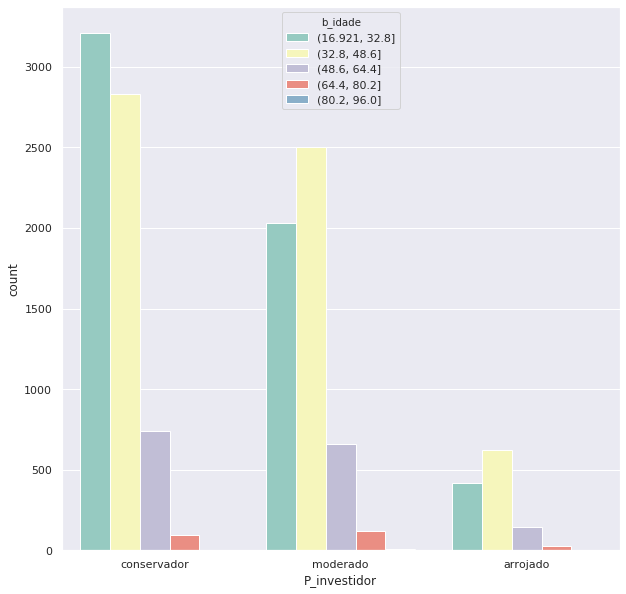

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="b_idade", data=df_client)

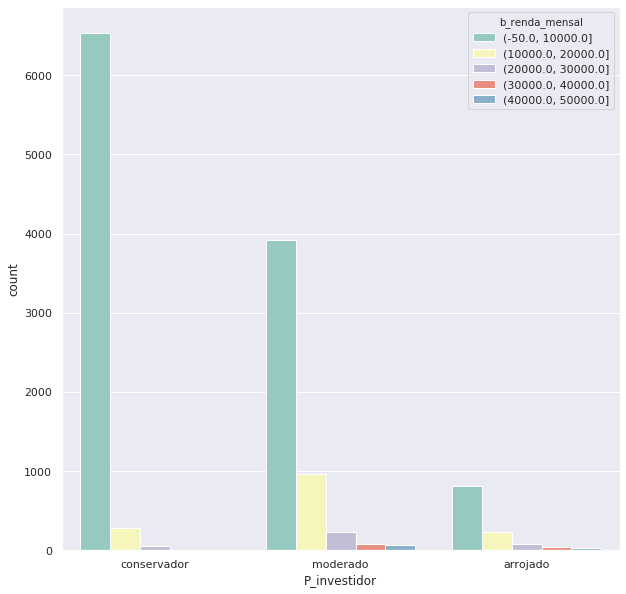

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="b_renda_mensal", data=df_client)

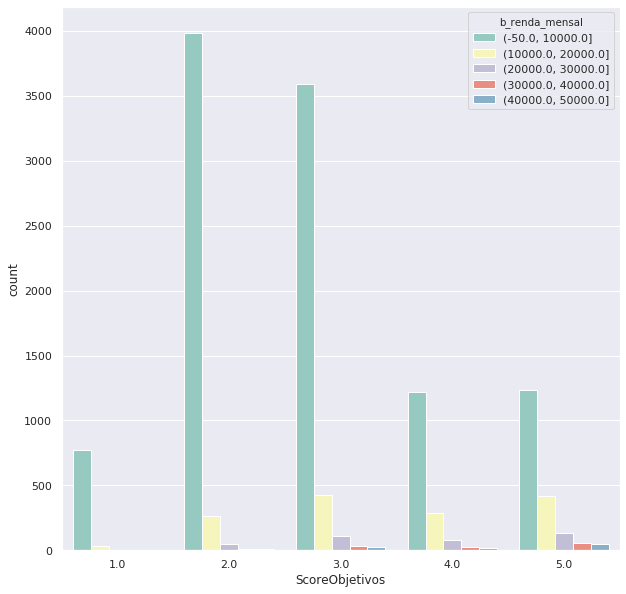

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x='ScoreObjetivos', hue="b_renda_mensal", data=df_client)

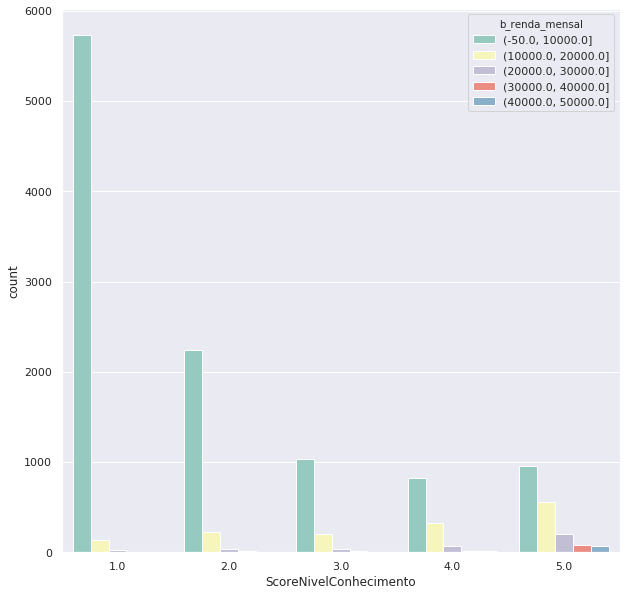

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(x='ScoreNivelConhecimento', hue="b_renda_mensal", data=df_client)

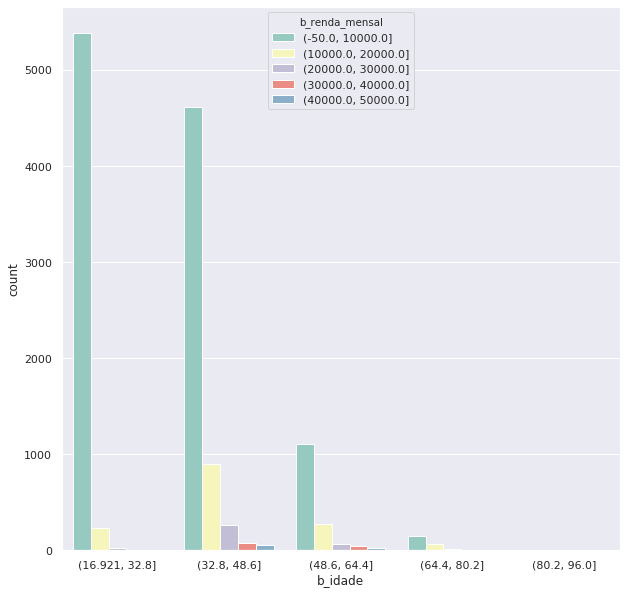

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_idade', hue="b_renda_mensal", data=df_client)

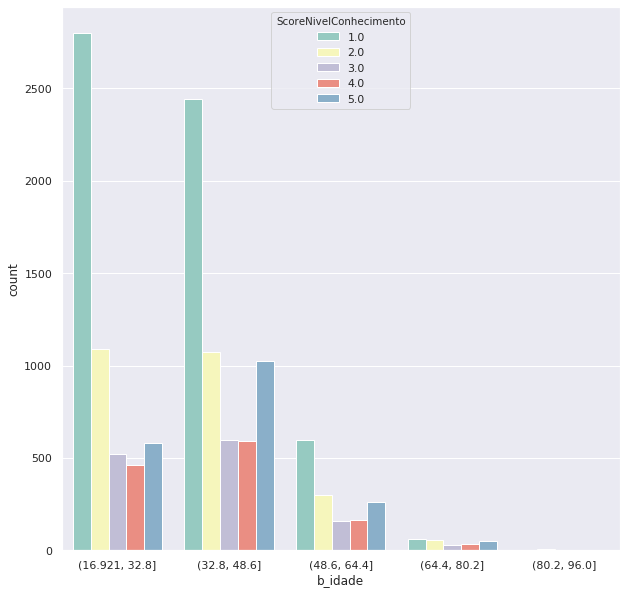

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_idade', hue="ScoreNivelConhecimento", data=df_client)

# ------------------------------------------------------

# Data wrangling de Respostas

# ------------------------------------------------------

In [32]:
df_respostas= df_01[respostas_cols]
df_respostas.drop_duplicates(inplace=True, subset=['Id'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
print(f"Clientes únicos: {df_respostas.shape[0]}\n\n")
print(f"Por quanto tempo você pretende manter seu dinheiro investido?:\n{df_respostas['Resposta11'].value_counts()}\n\n")
print(f"Dos seus investimentos, qual a necessidade de resgate diário?:\n{df_respostas['Resposta31'].value_counts()}\n\n")
print(f"Quanto da sua renda mensal você consegue guardar para investir?:\n{df_respostas['Resposta81'].value_counts()}\n\n")

Clientes únicos: 13409


Por quanto tempo você pretende manter seu dinheiro investido?:
Não tenho tempo definido, mas busco possibilidade de resgate diário    3975
De 1 a 5 anos                                                          3781
Até 1 ano                                                              2943
Acima de 5 anos                                                        2198
Name: Resposta11, dtype: int64


Dos seus investimentos, qual a necessidade de resgate diário?:
Não preciso    5841
Até 30%        3387
Até 50%        2243
100%           1426
Name: Resposta31, dtype: int64


Quanto da sua renda mensal você consegue guardar para investir?:
Menor ou igual a 10% da minha renda    5906
Menor ou igual a 20% da minha renda    3329
Menor ou igual a 30% da minha renda    2093
Menor ou igual a 50% da minha renda     941
Mais de  50% da minha renda             628
Name: Resposta81, dtype: int64




In [34]:
df_respostas.head()

,Id,Resposta11,Resposta31,Resposta81
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,Até 1 ano,Até 30%,Menor ou igual a 10% da minha renda
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,"Não tenho tempo definido, mas busco possibilid...",Não preciso,Menor ou igual a 20% da minha renda
27,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,"Não tenho tempo definido, mas busco possibilid...",100%,Menor ou igual a 10% da minha renda
31,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,De 1 a 5 anos,Não preciso,Menor ou igual a 50% da minha renda
33,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,De 1 a 5 anos,Até 50%,Menor ou igual a 10% da minha renda


## Feature engineering respostas

In [35]:
df_respostas['tempo_dinheiro_inves'] = df_respostas['Resposta11'].apply(lambda x: '1_ano' if x == 'Até 1 ano' else
                                                                       '1_a_5_anos' if x == 'De 1 a 5 anos' else
                                                                       'acima_5_anos' if x == 'Acima de 5 anos' else
                                                                       'inder')

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_respostas['resgate_dia'] = df_respostas['Resposta31'].apply(lambda x: 30 if x == 'Até 30%' else
                                                             50 if x == 'Até 50%' else
                                                             100 if x == '100%' else
                                                             0)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_respostas['inves_renda_mensal'] = df_respostas['Resposta81'].apply(lambda x: 10 if x == 'Menor ou igual a 10% da minha renda' else
                                                                     20 if x == 'Menor ou igual a 20% da minha renda' else
                                                                     30 if x == 'Menor ou igual a 30% da minha renda' else
                                                                     50 if x == 'Menor ou igual a 50% da minha renda' else
                                                                     75)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_respostas.head()

,Id,Resposta11,Resposta31,Resposta81,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,Até 1 ano,Até 30%,Menor ou igual a 10% da minha renda,1_ano,30,10
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,"Não tenho tempo definido, mas busco possibilid...",Não preciso,Menor ou igual a 20% da minha renda,inder,0,20
27,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,"Não tenho tempo definido, mas busco possibilid...",100%,Menor ou igual a 10% da minha renda,inder,100,10
31,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,De 1 a 5 anos,Não preciso,Menor ou igual a 50% da minha renda,1_a_5_anos,0,50
33,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,De 1 a 5 anos,Até 50%,Menor ou igual a 10% da minha renda,1_a_5_anos,50,10


## Exploração dos dados

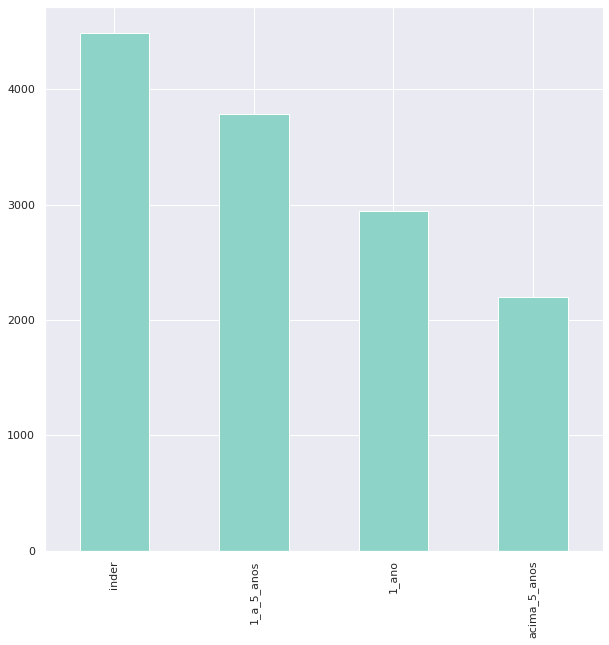

In [39]:
plt.figure(figsize=(10,10))
df_respostas['tempo_dinheiro_inves'].value_counts().plot(kind='bar')

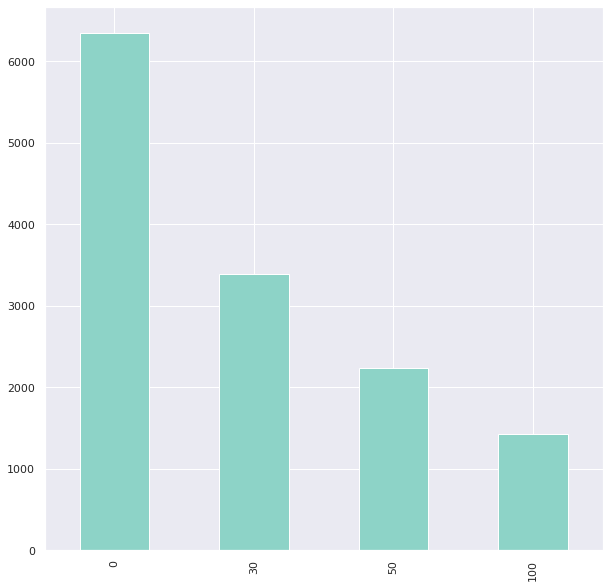

In [40]:
plt.figure(figsize=(10,10))
df_respostas['resgate_dia'].value_counts().plot(kind='bar')

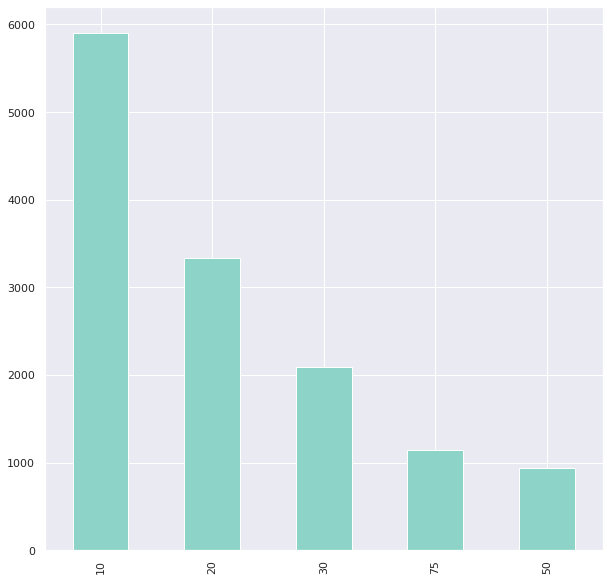

In [41]:
plt.figure(figsize=(10,10))
df_respostas['inves_renda_mensal'].value_counts().plot(kind='bar')

## Merging Clientes com respostas

In [42]:
df_client_merged = df_client.merge(df_respostas[['Id', 'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal']], how='inner', on='Id')

# Calcula quanto o cliente possivelmente irá investir por mês
df_client_merged['possivel_renda_investida_mes'] = df_client_merged[['inves_renda_mensal', 'RendaMensal']].apply(lambda x:
                                                                                                                (x['inves_renda_mensal'] / 100) * x['RendaMensal'],
                                                                                                                axis= 1)

## Exploração Bivariada

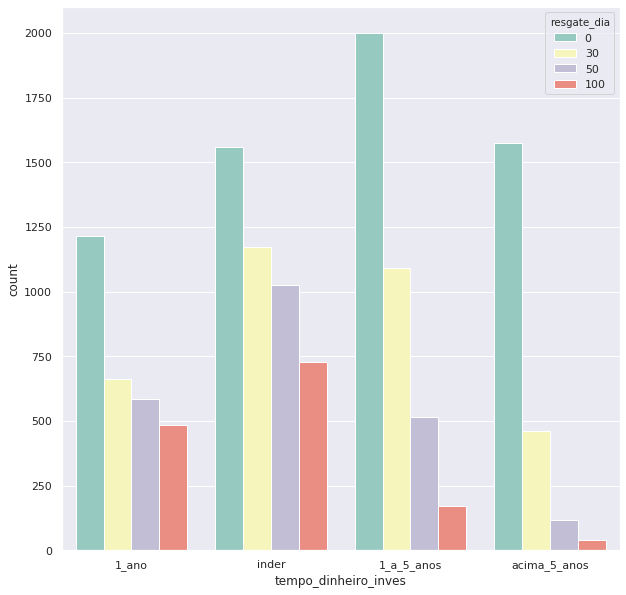

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(x='tempo_dinheiro_inves', hue="resgate_dia", data=df_client_merged)

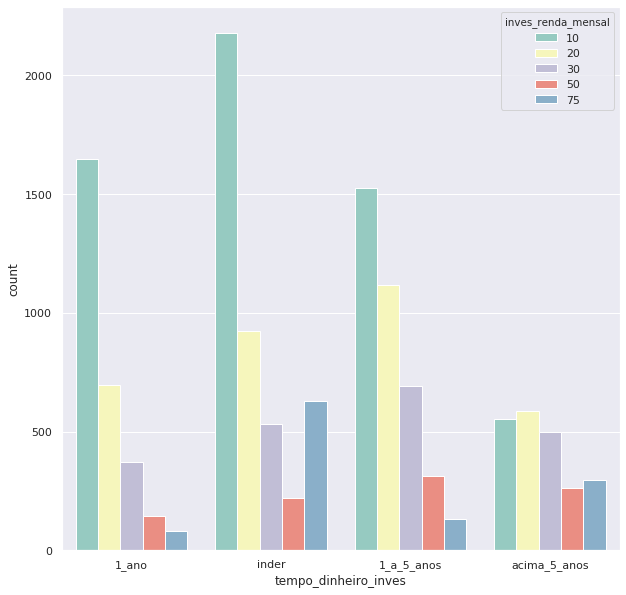

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(x='tempo_dinheiro_inves', hue="inves_renda_mensal", data=df_client_merged)

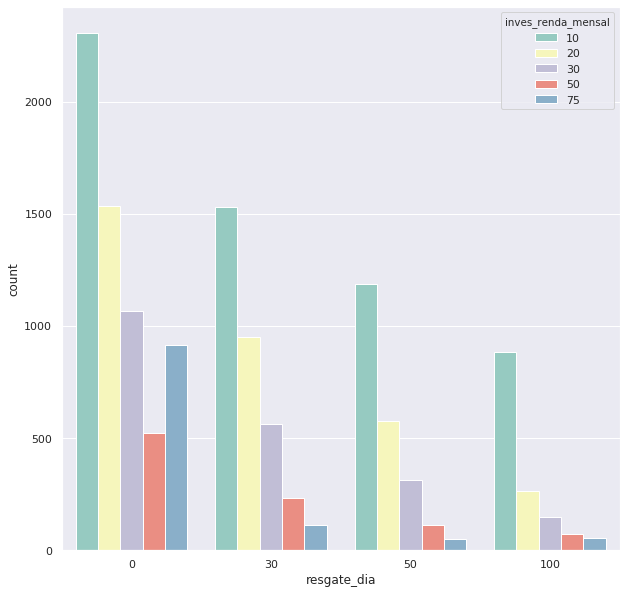

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='resgate_dia', hue="inves_renda_mensal", data=df_client_merged)

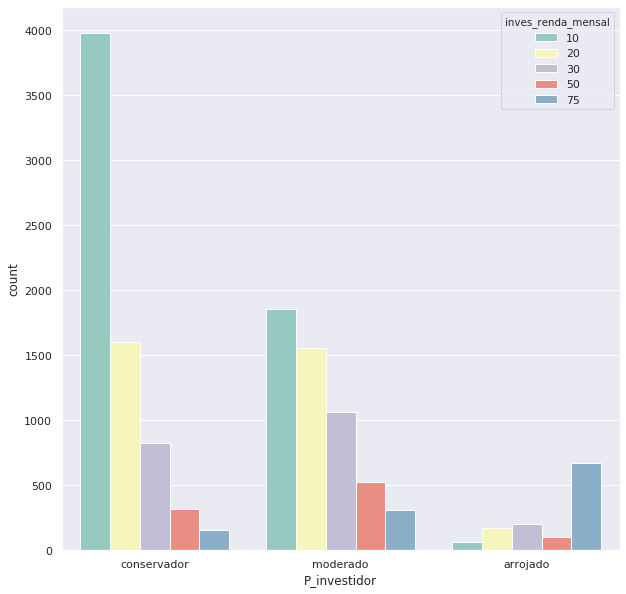

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="inves_renda_mensal", data=df_client_merged)

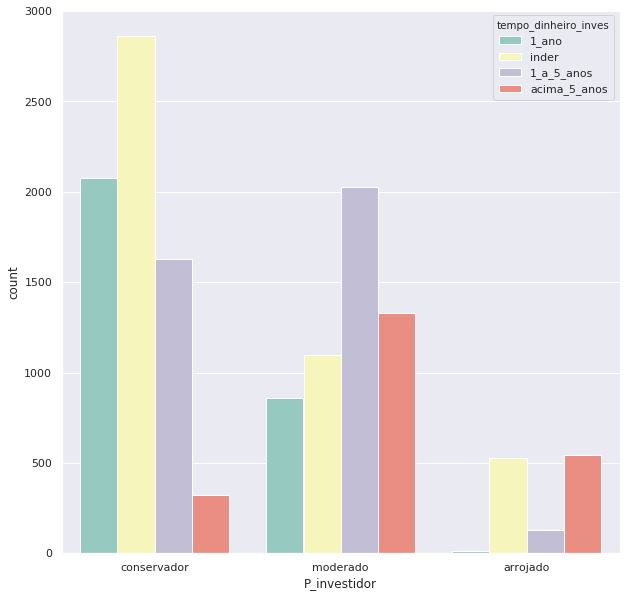

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="tempo_dinheiro_inves", data=df_client_merged)

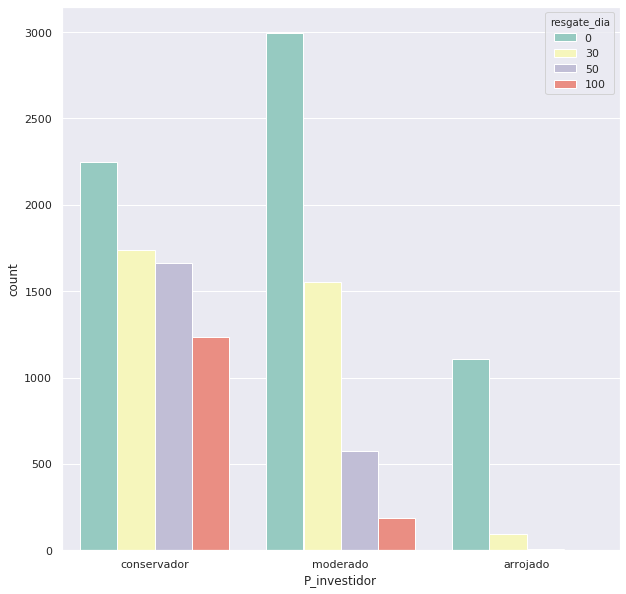

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="resgate_dia", data=df_client_merged)

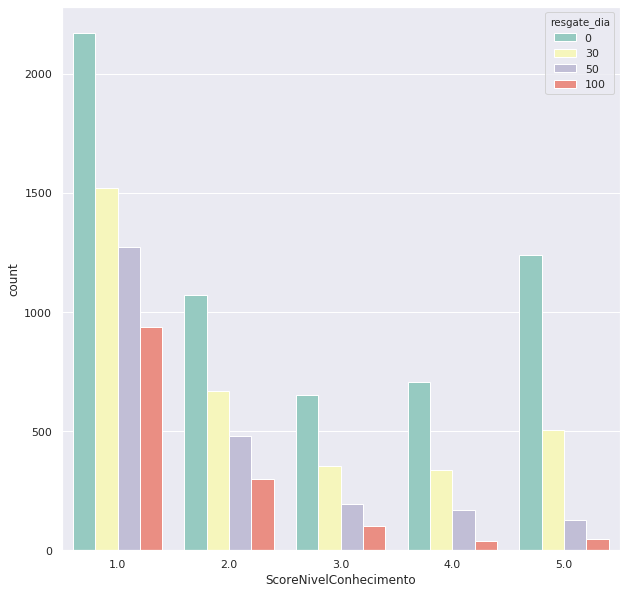

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(x='ScoreNivelConhecimento', hue="resgate_dia", data=df_client_merged)

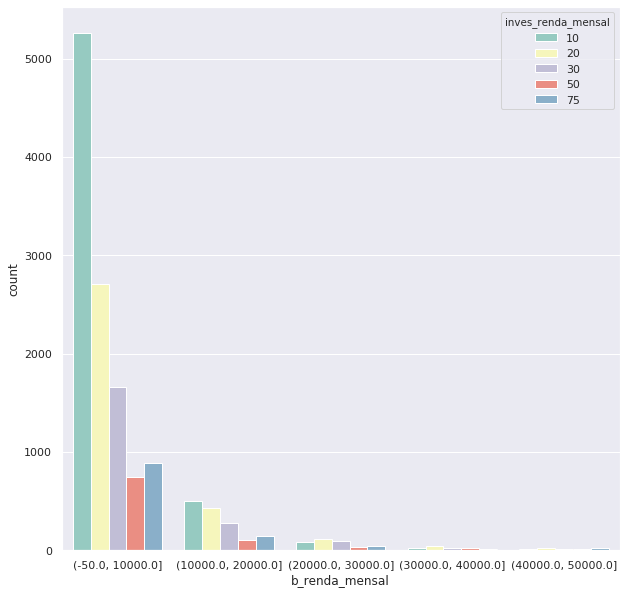

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_renda_mensal', hue="inves_renda_mensal", data=df_client_merged)

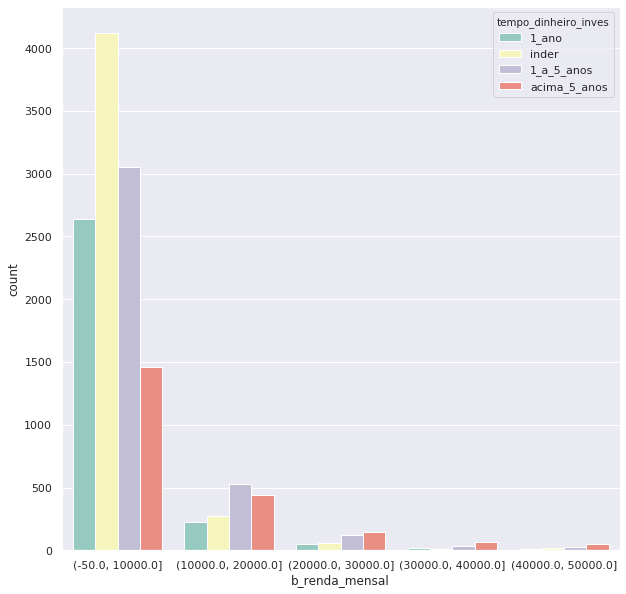

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_renda_mensal', hue="tempo_dinheiro_inves", data=df_client_merged)

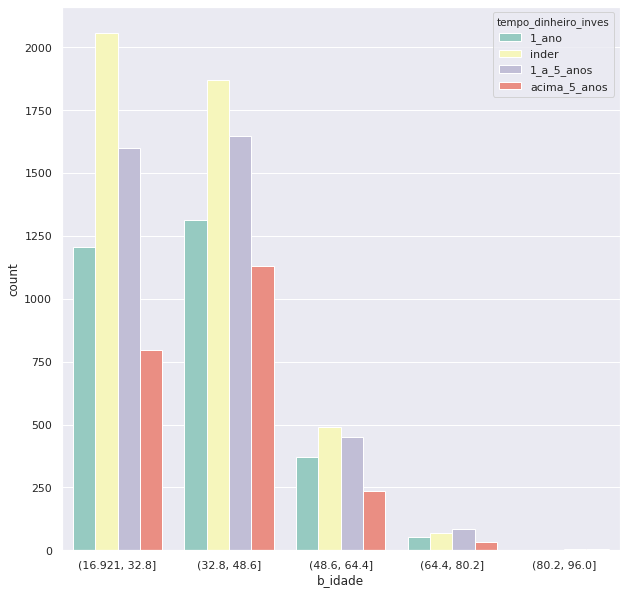

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_idade', hue="tempo_dinheiro_inves", data=df_client_merged)

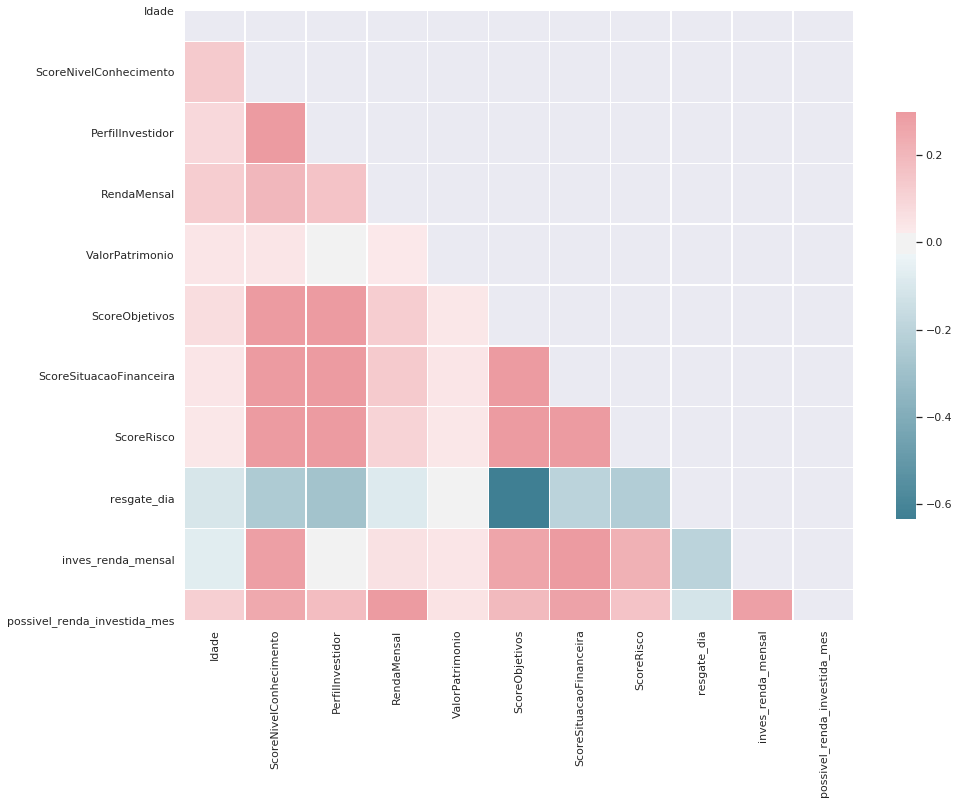

In [53]:
plt.figure(figsize=(15,15))
corr = df_client_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [143]:
df_client_merged.to_csv('./data/processados/clientes.csv', index= False)